<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/DS_D62_54_1_LU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
breast_cancer = pd.read_csv('/content/Breast_Cancer_Dataset.csv')
X = breast_cancer.data
y = breast_cancer.target

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
breast_cancer = pd.read_csv('/content/Breast_Cancer_Dataset.csv')
# Access all columns except 'id' and 'diagnosis' for features
X = breast_cancer.drop(['id', 'diagnosis'], axis=1)
y = breast_cancer['diagnosis']  # Access the 'diagnosis' column for target

In [ ]:
X.shape

(569, 31)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
!pip install -U scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Load the dataset
breast_cancer = pd.read_csv('/content/Breast_Cancer_Dataset.csv')

# Access all columns except 'id' and 'diagnosis' for features
X = breast_cancer.drop(['id', 'diagnosis'], axis=1)
y = breast_cancer['diagnosis']  # Access the 'diagnosis' column for target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Now this line should work without errors

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[141,   7],
       [  7,  73]])

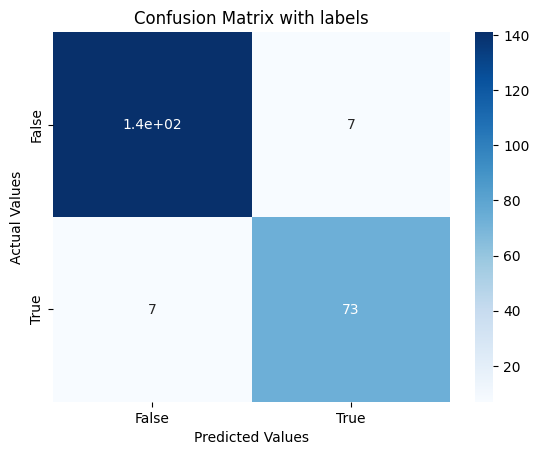

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf,annot=True,cmap='Blues')

ax.set_title("Confusion Matrix with labels")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()